In [2]:
using Pkg
Pkg.activate("c:/Users/ito23/Documents/学院科目/物性物理学特論Ⅰ/Julia/day5/Mypackage")

  Activating project at `c:\Users\ito23\Documents\学院科目\物性物理学特論Ⅰ\Julia\day5\Mypackage`


In [3]:
import Mypackage
using Plots
using LaTeXStrings

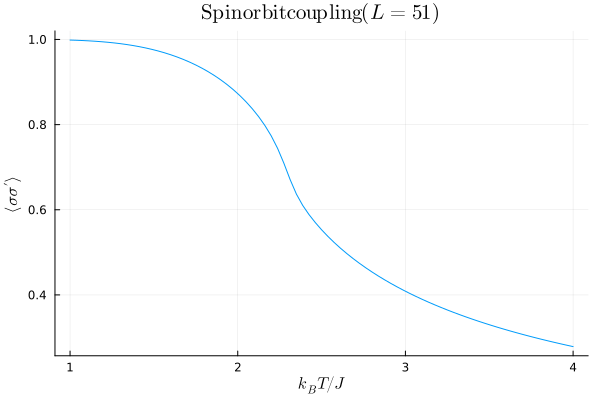

In [ ]:
# スピン相関の測定

# 定数の定義
J = 1.0
k_B = 1.0
T = range(1.0, 4.0, length = 81)
K = J ./ k_B ./ T
L = 25
chi = 200
mm = []

# 計算

for Ks in K
    W, P, C = Mypackage.tensor_origin_fix(Ks)

    for LL in 2:L
        # 拡大
        C = Mypackage.expand_tensor_2legs(W, P, C)
        P = Mypackage.expand_tensor_3legs(W, P)

        # 圧縮
        if 2^LL > chi
            C, P = Mypackage.compress_tensor(C, P, chi)
        end
    end

    # 測定
    G, O = Mypackage.environment_tensor(W, P, C)
    push!(mm, Mypackage.measure_spin_correlation(W, G, O))

    # メモリの開放
    GC.gc()
end

plot(T, mm, xlabel = L"k_BT/J", ylabel = L"\langle\sigma\sigma^\prime\rangle", title = L"\textrm{Spin orbit coupling} (\textit{L=51})", label=false)

In [5]:
GC.gc()

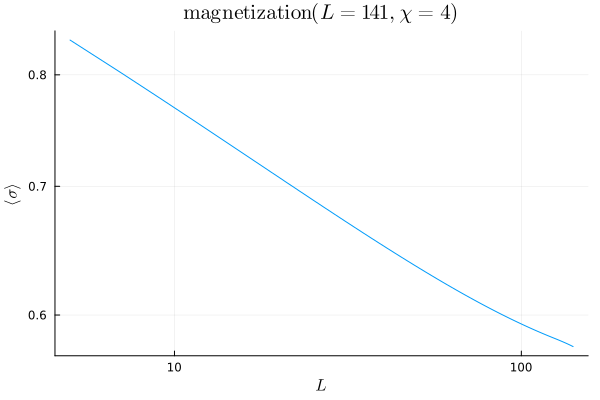

In [6]:
# 転移温度付近における磁化の測定(chi=4)

# 定数の定義
J = 1.0
k_B = 1.0
T_C = 2.0 / log(1 + sqrt(2))
K_C = J / k_B / T_C
L = 70
chi = 4
Ls = []
m = []

# 計算

W, P, C = Mypackage.tensor_origin_fix(K_C)

for LL in 2:L
    # 拡大
    C = Mypackage.expand_tensor_2legs(W, P, C)
    P = Mypackage.expand_tensor_3legs(W, P)

    # 圧縮
    if 2^LL > chi
        C, P = Mypackage.compress_tensor(C, P, chi)
    end

    # 測定
    G, O = Mypackage.environment_tensor(W, P, C)
    push!(m, Mypackage.measure_magnetization(W, G, O))
    push!(Ls, 2 * LL + 1)

    # メモリの開放
    GC.gc()

end


xtick_vals = [1, 10, 100, 1000]
xtick_labels = string.(xtick_vals)

ytick_vals = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ytick_labels = string.(ytick_vals)

plot(Ls, m, xscale=:log10, yscale=:log10, xticks = (xtick_vals, xtick_labels), yticks = (ytick_vals, ytick_labels), xlabel=L"L", ylabel=L"\langle\sigma\rangle", title=L"\textrm{magnetization} (\textit{L=141, \chi =4})", label=false)

In [7]:
GC.gc()

Any[5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141]


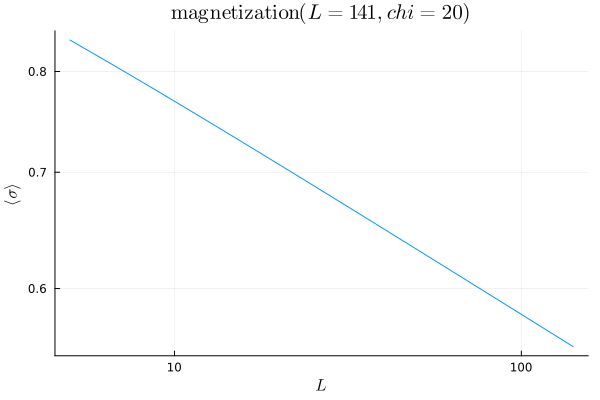

In [8]:
# 転移温度付近における磁化の測定(chi=20)

# 定数の定義
J = 1.0
k_B = 1.0
T_C = 2.0 / log(1 + sqrt(2))
K_C = J / k_B / T_C
L = 70
chi = 20
Ls = []
m = []

# 計算

W, P, C = Mypackage.tensor_origin_fix(K_C)

for LL in 2:L
    # 拡大
    C = Mypackage.expand_tensor_2legs(W, P, C)
    P = Mypackage.expand_tensor_3legs(W, P)

    # 圧縮
    if 2^LL > chi
        C, P = Mypackage.compress_tensor(C, P, chi)
    end

    # 測定
    G, O = Mypackage.environment_tensor(W, P, C)
    push!(m, Mypackage.measure_magnetization(W, G, O))
    push!(Ls, 2 * LL + 1)

end


xtick_vals = [1, 10, 100, 1000]
xtick_labels = string.(xtick_vals)

ytick_vals = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ytick_labels = string.(ytick_vals)

println(Ls)
plot(Ls, m, xscale=:log10, yscale=:log10, xticks = (xtick_vals, xtick_labels), yticks = (ytick_vals, ytick_labels), xlabel=L"L", ylabel=L"\langle\sigma\rangle", title=L"\textrm{magnetization} (\textit{L=141, chi=20})", label=false)